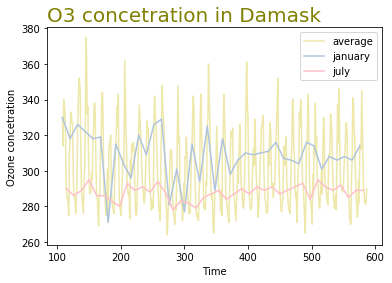

In [49]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt

#Широта: 33.5102000°
#Долгота: 36.2912800°

lon = 36.29
lat = 33.51
coord=[36.3,33.5]
name='Damask'
with netcdf.netcdf_file('/Users/ananasokeanov/Downloads/MSR-2.nc', mmap=False) as file:
    #print(file.variables.keys())
    #print(file.variables['time'].shape)
    lons = file.variables['longitude'].data[:]  
    lats = file.variables['latitude'].data[:]
    time = file.variables['time'][:]
    avs = file.variables['Average_O3_column'][:]
    stds = file.variables['Average_O3_std'][:]
    idx_1 = np.searchsorted(lons, lon, side="left")
    idx_2 = np.searchsorted(lats, lat, side="left")
    data = []
    for i in range(len(time)):
            data.append(avs[i,idx_2,idx_1])
            
   
 

    
 

plt.figure()  
plt.ylabel('Ozone concetration')
plt.xlabel('Time')
plt.plot(time, data, label='average', color='palegoldenrod')
plt.plot(time[::12]  , data[::12], '-', label = 'january', color='lightsteelblue') 
plt.plot(time[6::12]  , data[6::12], '-', label = 'july', color='pink')
plt.legend()
plt.title("O3 concetration in Damask", loc='left', fontsize=20, fontweight=0, color='olive')
plt.savefig('ozone.png')





import json



sonj = {
    'city' : 'Damask',
    'coordingates' : [lat, lon],
    'jan' : {
        'min' : float(np.min(data[::12])),
        'max' : float(np.max(data[::12])),
        'mean' : float(np.mean(data[::12]))
    },
    'jul' : {
        'min' : float(np.min(data[6::12])),
        'max' : float(np.max(data[6::12])),
        'mean' : float( np.mean(data[6::12]))
    },
    'all' : {
        'max' : float(np.max(data)),
        'min' : float(np.min(data)),
        'mean': float(np.mean(data))
    }
}


with open('Ozone.json', 'w') as cout:
    json.dump(sonj, cout)

    


    